In [1]:
import pandas as pd
df = pd.read_csv("c:/data/wine/wine_new.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0


In [2]:
df["class"].value_counts()

1    855
0    744
Name: class, dtype: int64

In [3]:
train_cols = df.columns[0:11] #0~10 필드
X = df[train_cols] # 독립변수
y = df["class"]

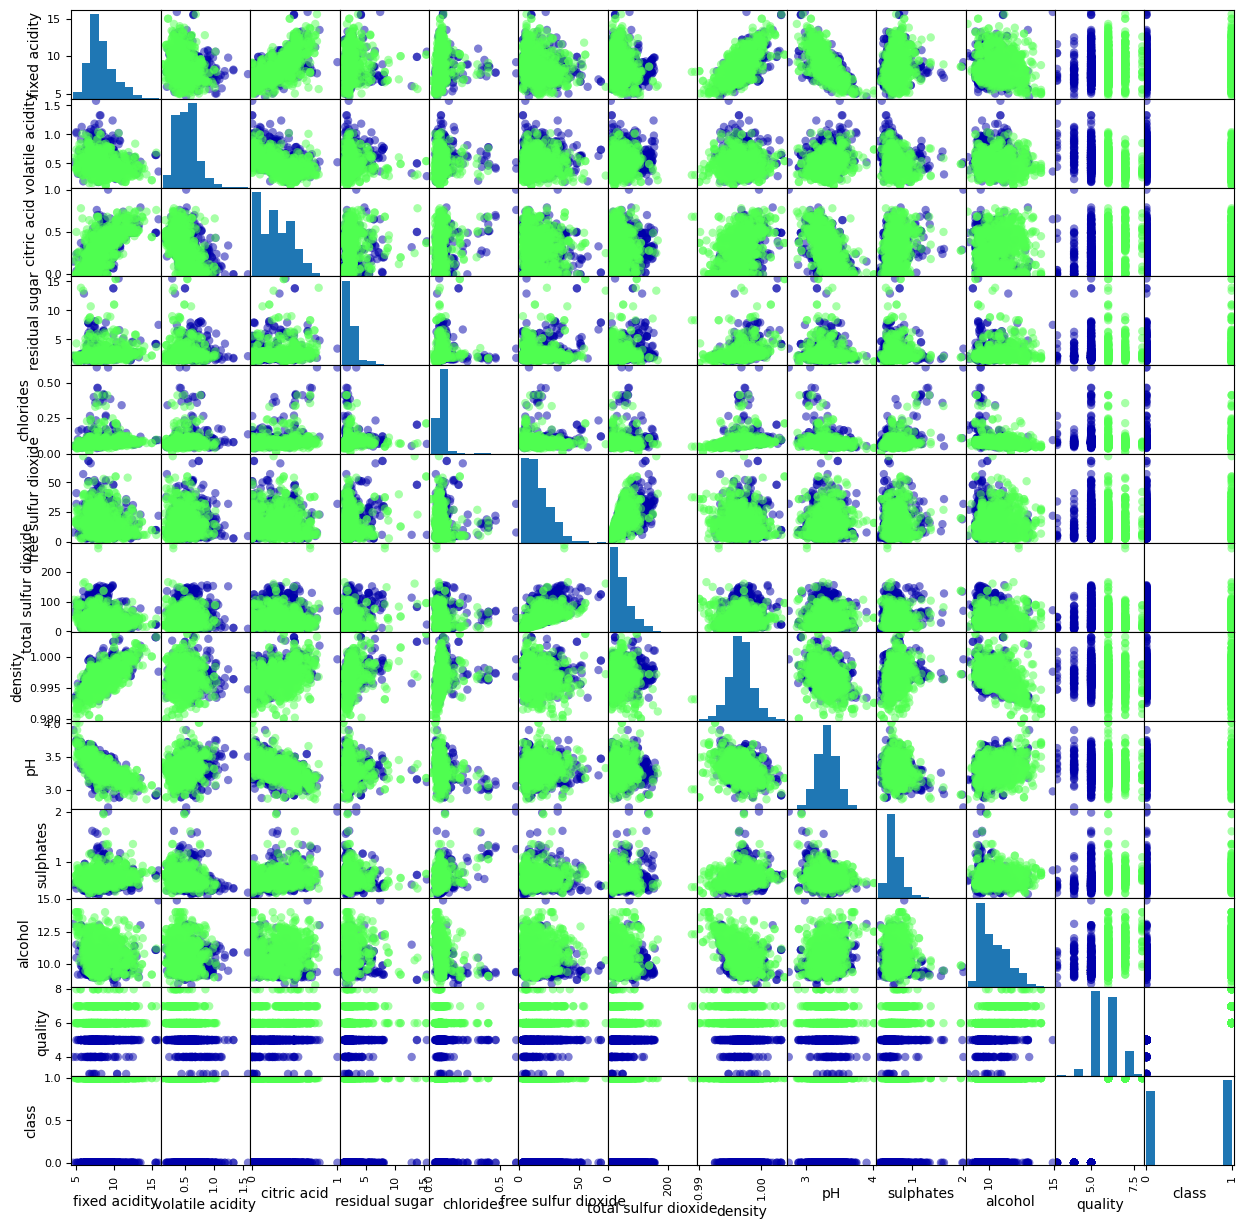

In [4]:
import mglearn
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(df,c=y,figsize=(15,15),marker='o',cmap=mglearn.cm3)
plt.show()

In [5]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['class'])
df2=pd.concat([X_samp,y_samp],axis=1)
df2["class"].value_counts()

0    744
1    744
Name: class, dtype: int64

In [6]:
X = X_samp[train_cols] # 독립변수
y = y_samp["class"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [8]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=0)
model.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [9]:
import numpy as np
pred=model.predict(X_test)
print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))
print("검증용:",np.mean(pred == y_test))

학습용: 0.7445378151260504
검증용: 0.7449664429530202
검증용: 0.7449664429530202


In [10]:
#데이터 전처리 0.0~1.0
# 학습용 데이터셋의 변수들의 평균값 계산
mean_on_train = X_train.mean(axis=0)
# 학습용 데이터셋의 변수들의 표준편차값 계산
std_on_train = X_train.std(axis=0)
# 값에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled = (X_train - mean_on_train) / std_on_train
# 검증용 데이터셋에도 같은 계산 적용
X_test_scaled = (X_test - mean_on_train) / std_on_train
print(X_train_scaled.describe())
print(X_test_scaled.describe())

       fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.190000e+03      1.190000e+03  1.190000e+03    1.190000e+03   
mean   -3.356279e-15      3.933362e-16 -4.277158e-16    3.167401e-16   
std     1.000000e+00      1.000000e+00  1.000000e+00    1.000000e+00   
min    -2.153707e+00     -2.293418e+00 -1.390244e+00   -1.132993e+00   
25%    -6.907913e-01     -7.862384e-01 -9.243934e-01   -4.502770e-01   
50%    -2.226582e-01     -6.055926e-02 -9.621486e-02   -2.454622e-01   
75%     4.795413e-01      6.092984e-01  7.837248e-01    2.762418e-02   
max     4.458672e+00      5.856517e+00  3.785872e+00    8.834659e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.190000e+03         1.190000e+03          1.190000e+03  1.190000e+03   
mean   8.116290e-15        -3.531256e-17          6.400109e-17  4.392937e-13   
std    1.000000e+00         1.000000e+00          1.000000e+00  1.000000e+00   
min   -1.621587e+00        -1.4

In [11]:
#표준화된 데이터로 다시 훈련
model = MLPClassifier(random_state=0)
model.fit(X_train_scaled, y_train)
#최대 반복 횟수에 도달했다는 경고 : max_iter 반복횟수를 늘려야 함

c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [12]:
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))
#예측률이 향상됨

학습용: 0.8134453781512605
검증용: 0.7986577181208053


In [13]:
# 최대 반복 횟수 max_iter를 200에서 5000으로 늘림
model = MLPClassifier(max_iter=1000,random_state=42)
model.fit(X_train_scaled, y_train)
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))
#예측률이 향상됨

학습용: 0.9327731092436975
검증용: 0.825503355704698


c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
# 은닉층을 2개로 늘림
model = MLPClassifier(max_iter=1000,hidden_layer_sizes=[100,100],random_state=0)
model.fit(X_train_scaled, y_train)
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))
#예측률이 향상됨

학습용: 0.9991596638655462
검증용: 0.8187919463087249


In [15]:
# 은닉층을 3개로 늘림
model = MLPClassifier(max_iter=1000,hidden_layer_sizes=[100,100,100],random_state=0)
model.fit(X_train_scaled, y_train)
print("학습용:",model.score(X_train_scaled, y_train))
print("검증용:",model.score(X_test_scaled, y_test))
#더이상 개선되지 않음

학습용: 1.0
검증용: 0.7919463087248322


In [16]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test_scaled)
confusion_matrix(y_test, pred)

array([[117,  30],
       [ 32, 119]], dtype=int64)

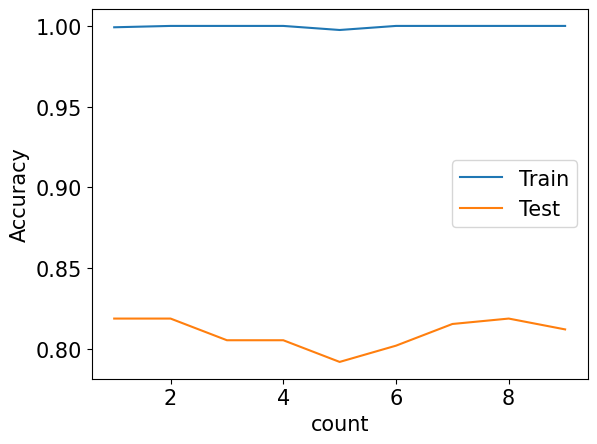

In [11]:
# 최적의 은닉노드 개수를 구하기 위한 실험
import numpy as np
import matplotlib.pyplot as plt
train_rate=[]
test_rate=[]

for i in range(100,301,100): # 첫번째 은닉층의 노드수 100~300
    for j in range(100,301,100): #두번째 은닉층의 노드수 100~300
        model=MLPClassifier(random_state=0, hidden_layer_sizes=[i,j],max_iter=1000)
        model.fit(X_train_scaled,y_train)
        train_rate.append(model.score(X_train_scaled,y_train))
        test_rate.append(model.score(X_test_scaled,y_test))

plt.rcParams['font.size']=15
plt.plot(range(1,10),train_rate,label='Train')
plt.plot(range(1,10),test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('count')
plt.legend()

In [12]:
max_rate=max(test_rate) #최대값
idx=np.where(test_rate == max_rate)[0][0] #최대값의 인덱스값
print('idx:',idx)
print('최고정확도:',max_rate)

cnt=0
for i in range(100,301,100):
    for j in range(100,301,100):
        if cnt == idx:
            print(i,j)
        cnt+=1

idx: 0
최고정확도: 0.8187919463087249
100 100


In [13]:
#실험을 통해 구한 최적의 은닉노드수로 만든 모형
model=MLPClassifier(hidden_layer_sizes=[300,100],random_state=0)
model.fit(X_train_scaled,y_train)
print('학습용:{:6.2f}%'.format(model.score(X_train_scaled,y_train)*100))
print('검증용:{:6.2f}%'.format(model.score(X_test_scaled,y_test)*100))

학습용: 99.58%
검증용: 84.23%


c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
